# Rice Leaf Disease


## Project description : Rice Leaf Disease using CNN

Data set of Rice Leaf Disease prediction is an CNN model, were we need to predict the Rice Leaf Disease. The data set contains 119 images with 3 classes. Our main goal is to train CNN algorithm based on the dataset so when a new image is fed, our best model can be used to predict.

#### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger
import os
import cv2

#### Project Description

#### To generate multimple images for train and test data

In [2]:
DataGen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                             shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

#### Now we have a total number of 1200 train images and 240 test images in image repository.

#### Getting the augmented train and test data from the image repository

In [3]:
path_train = r"C:\Users\Bhanu Prakash\OneDrive\Desktop\Data"
path_test = r"C:\Users\Bhanu Prakash\OneDrive\Desktop\Data"

###### Showing augmented images

In [4]:
def plotImages(images_array):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip (images_array, axes):
        ax.imshow(img)
    plt.tight_layout()

##### Let us try to create more images for our train dataset

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [6]:
# Generate more images for training data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data


training_data = train_datagen.flow_from_directory(path_train, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      shuffle=True,
                                      class_mode='binary')

Found 119 images belonging to 5 classes.


In [7]:
training_data.class_indices

{'Bacterial leaf blight': 0,
 'Brown spot': 1,
 'Leaf smut': 2,
 'assets': 3,
 'variables': 4}

##### This is the augmentation configuration we will use for test data

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [9]:
# This is a similar generator for testing data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data

test_data = test_datagen.flow_from_directory(path_test,
                                  target_size=(150,150),
                                  batch_size=32,
                                  shuffle=True,
                                  class_mode='binary')

Found 119 images belonging to 5 classes.


In [10]:
test_data.class_indices

{'Bacterial leaf blight': 0,
 'Brown spot': 1,
 'Leaf smut': 2,
 'assets': 3,
 'variables': 4}

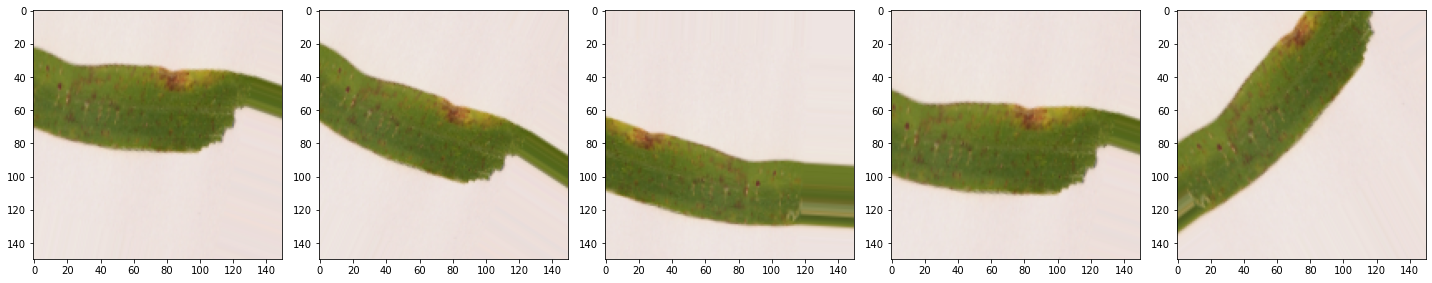

In [11]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

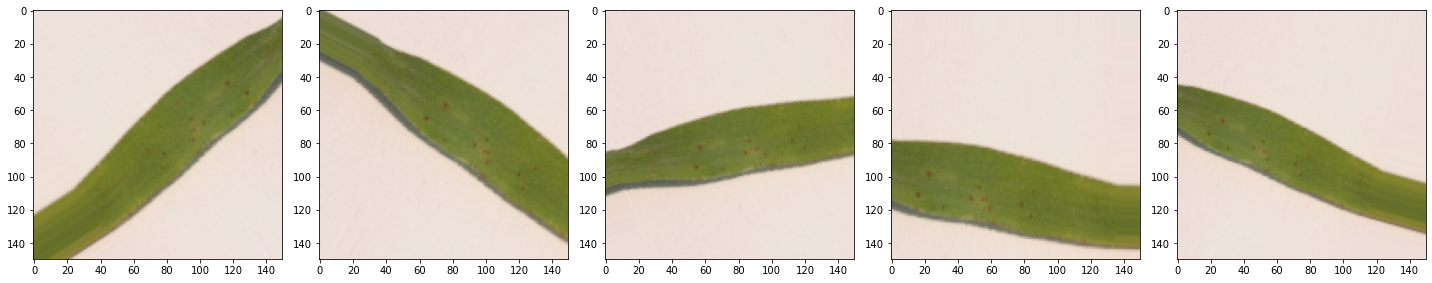

In [12]:
images = [test_data[0][0][0] for i in range(5)]
plotImages(images)

##### Let us create a path where our model will saved - with model path
##### Let us monitor the validation accuracy and save the model with best validation accuracy
##### Let us save the model in the csv format in order to generate graphs
##### We will do it with the help of callbacks

In [13]:
model_path = r"C:\Users\Bhanu Prakash\OneDrive\Desktop\Data" 
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('my_logs.csv', separator = ',', append=False)
callbacks_list = [checkpoint, log_csv]

##### Let us build the CNN model

In [14]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) ,  activation ='relu' , input_shape = [150, 150, 3]  ))
model.add(MaxPool2D(pool_size =(2,2)))


model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = [150, 150, 3]))
model.add(Dropout(0.4))
model.add(Dense(3 , activation= 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

##### Let us train the CNN model using training data, test data, for 500 epochs and our callback list

In [15]:
history = model.fit(training_data, epochs=500, verbose=1, validation_data= test_data, callbacks=callbacks_list)

Epoch 1/500
4/4 [==============================] - ETA: 0s - loss: 1.3215 - accuracy: 0.3193
Epoch 1: val_accuracy improved from -inf to 0.41176, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 25s 7s/step - loss: 1.3215 - accuracy: 0.3193 - val_loss: 1.1214 - val_accuracy: 0.4118
Epoch 2/500
4/4 [==============================] - ETA: 0s - loss: 1.1809 - accuracy: 0.3697
Epoch 2: val_accuracy did not improve from 0.41176
4/4 [==============================] - 27s 8s/step - loss: 1.1809 - accuracy: 0.3697 - val_loss: 1.0976 - val_accuracy: 0.3613
Epoch 3/500
4/4 [==============================] - ETA: 0s - loss: 1.1228 - accuracy: 0.3782
Epoch 3: val_accuracy improved from 0.41176 to 0.42017, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 1.1228 - accuracy: 0.3782 - val_loss: 1.0748 - val_accuracy: 0.4202
Epoch 4/500
4/4 [==============================] - ETA: 0s - loss: 1.1189 - accuracy: 0.3361
Epoch 4: val_accuracy did not improve from 0.42017
4/4 [==============================] - 32s 9s/step - loss: 1.1189 - accuracy: 0.3361 - val_loss: 1.0704 - val_accuracy: 0.4034
Epoch 5/500
4/4 [==============================] - ETA: 0s - loss: 1.0965 - accuracy: 0.4118
Epoch 5: val_accuracy improved from 0.42017 to 0.46218, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 41s 12s/step - loss: 1.0965 - accuracy: 0.4118 - val_loss: 1.0555 - val_accuracy: 0.4622
Epoch 6/500
4/4 [==============================] - ETA: 0s - loss: 1.0833 - accuracy: 0.4118
Epoch 6: val_accuracy did not improve from 0.46218
4/4 [==============================] - 32s 9s/step - loss: 1.0833 - accuracy: 0.4118 - val_loss: 1.0507 - val_accuracy: 0.4370
Epoch 7/500
4/4 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.4118
Epoch 7: val_accuracy did not improve from 0.46218
4/4 [==============================] - 32s 9s/step - loss: 1.0662 - accuracy: 0.4118 - val_loss: 1.0356 - val_accuracy: 0.4622
Epoch 8/500
4/4 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.4706
Epoch 8: val_accuracy improved from 0.46218 to 0.53782, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 1.0411 - accuracy: 0.4706 - val_loss: 1.0232 - val_accuracy: 0.5378
Epoch 9/500
4/4 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.4454
Epoch 9: val_accuracy did not improve from 0.53782
4/4 [==============================] - 32s 10s/step - loss: 1.0716 - accuracy: 0.4454 - val_loss: 1.0315 - val_accuracy: 0.4706
Epoch 10/500
4/4 [==============================] - ETA: 0s - loss: 1.0360 - accuracy: 0.4538
Epoch 10: val_accuracy did not improve from 0.53782
4/4 [==============================] - 32s 9s/step - loss: 1.0360 - accuracy: 0.4538 - val_loss: 1.0050 - val_accuracy: 0.5378
Epoch 11/500
4/4 [==============================] - ETA: 0s - loss: 1.0409 - accuracy: 0.4706
Epoch 11: val_accuracy did not improve from 0.53782
4/4 [==============================] - 32s 9s/step - loss: 1.0409 - accuracy: 0.4706 - val_loss: 1.0125 - val_accuracy: 0.4622
Epoch 12/500
4/4 [==============================] - ET

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 39s 12s/step - loss: 1.0087 - accuracy: 0.4454 - val_loss: 0.9433 - val_accuracy: 0.5462
Epoch 20/500
4/4 [==============================] - ETA: 0s - loss: 0.9692 - accuracy: 0.5294
Epoch 20: val_accuracy did not improve from 0.54622
4/4 [==============================] - 31s 9s/step - loss: 0.9692 - accuracy: 0.5294 - val_loss: 0.9583 - val_accuracy: 0.4790
Epoch 21/500
4/4 [==============================] - ETA: 0s - loss: 0.9237 - accuracy: 0.5966
Epoch 21: val_accuracy did not improve from 0.54622
4/4 [==============================] - 32s 9s/step - loss: 0.9237 - accuracy: 0.5966 - val_loss: 0.9223 - val_accuracy: 0.5378
Epoch 22/500
4/4 [==============================] - ETA: 0s - loss: 0.9297 - accuracy: 0.5798
Epoch 22: val_accuracy did not improve from 0.54622
4/4 [==============================] - 31s 9s/step - loss: 0.9297 - accuracy: 0.5798 - val_loss: 0.9511 - val_accuracy: 0.5126
Epoch 23/500
4/4 [==============================] - E

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 0.9223 - accuracy: 0.5546 - val_loss: 0.9354 - val_accuracy: 0.5630
Epoch 24/500
4/4 [==============================] - ETA: 0s - loss: 0.9581 - accuracy: 0.5210
Epoch 24: val_accuracy improved from 0.56303 to 0.57983, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 0.9581 - accuracy: 0.5210 - val_loss: 0.9242 - val_accuracy: 0.5798
Epoch 25/500
4/4 [==============================] - ETA: 0s - loss: 0.9809 - accuracy: 0.5126
Epoch 25: val_accuracy did not improve from 0.57983
4/4 [==============================] - 32s 9s/step - loss: 0.9809 - accuracy: 0.5126 - val_loss: 0.9348 - val_accuracy: 0.5378
Epoch 26/500
4/4 [==============================] - ETA: 0s - loss: 0.9469 - accuracy: 0.4790
Epoch 26: val_accuracy improved from 0.57983 to 0.58824, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 0.9469 - accuracy: 0.4790 - val_loss: 0.8998 - val_accuracy: 0.5882
Epoch 27/500
4/4 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.4958
Epoch 27: val_accuracy did not improve from 0.58824
4/4 [==============================] - 32s 9s/step - loss: 0.9608 - accuracy: 0.4958 - val_loss: 0.9646 - val_accuracy: 0.5294
Epoch 28/500
4/4 [==============================] - ETA: 0s - loss: 0.9561 - accuracy: 0.4874
Epoch 28: val_accuracy did not improve from 0.58824
4/4 [==============================] - 32s 9s/step - loss: 0.9561 - accuracy: 0.4874 - val_loss: 0.9121 - val_accuracy: 0.5714
Epoch 29/500
4/4 [==============================] - ETA: 0s - loss: 0.9278 - accuracy: 0.5630
Epoch 29: val_accuracy did not improve from 0.58824
4/4 [==============================] - 32s 9s/step - loss: 0.9278 - accuracy: 0.5630 - val_loss: 0.9176 - val_accuracy: 0.5630
Epoch 30/500
4/4 [==============================] - E

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 40s 12s/step - loss: 0.9380 - accuracy: 0.5462 - val_loss: 0.8755 - val_accuracy: 0.6134
Epoch 34/500
4/4 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.5798
Epoch 34: val_accuracy did not improve from 0.61345
4/4 [==============================] - 32s 9s/step - loss: 0.9027 - accuracy: 0.5798 - val_loss: 0.8881 - val_accuracy: 0.5630
Epoch 35/500
4/4 [==============================] - ETA: 0s - loss: 0.8846 - accuracy: 0.5882
Epoch 35: val_accuracy did not improve from 0.61345
4/4 [==============================] - 31s 9s/step - loss: 0.8846 - accuracy: 0.5882 - val_loss: 0.8704 - val_accuracy: 0.5798
Epoch 36/500
4/4 [==============================] - ETA: 0s - loss: 0.9152 - accuracy: 0.5714
Epoch 36: val_accuracy did not improve from 0.61345
4/4 [==============================] - 32s 10s/step - loss: 0.9152 - accuracy: 0.5714 - val_loss: 0.8484 - val_accuracy: 0.5882
Epoch 37/500
4/4 [==============================] - 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.8730 - accuracy: 0.5546 - val_loss: 0.8391 - val_accuracy: 0.6471
Epoch 45/500
4/4 [==============================] - ETA: 0s - loss: 0.8885 - accuracy: 0.5966
Epoch 45: val_accuracy did not improve from 0.64706
4/4 [==============================] - 7s 2s/step - loss: 0.8885 - accuracy: 0.5966 - val_loss: 0.8654 - val_accuracy: 0.6471
Epoch 46/500
4/4 [==============================] - ETA: 0s - loss: 0.8909 - accuracy: 0.5798
Epoch 46: val_accuracy did not improve from 0.64706
4/4 [==============================] - 7s 2s/step - loss: 0.8909 - accuracy: 0.5798 - val_loss: 0.8669 - val_accuracy: 0.5798
Epoch 47/500
4/4 [==============================] - ETA: 0s - loss: 0.8548 - accuracy: 0.6471
Epoch 47: val_accuracy did not improve from 0.64706
4/4 [==============================] - 7s 2s/step - loss: 0.8548 - accuracy: 0.6471 - val_loss: 0.8372 - val_accuracy: 0.6303
Epoch 48/500
4/4 [==============================] - ETA: 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.8278 - accuracy: 0.6471 - val_loss: 0.8244 - val_accuracy: 0.6891
Epoch 55/500
4/4 [==============================] - ETA: 0s - loss: 0.8667 - accuracy: 0.6218
Epoch 55: val_accuracy did not improve from 0.68908
4/4 [==============================] - 7s 2s/step - loss: 0.8667 - accuracy: 0.6218 - val_loss: 0.7947 - val_accuracy: 0.6639
Epoch 56/500
4/4 [==============================] - ETA: 0s - loss: 0.8520 - accuracy: 0.6134
Epoch 56: val_accuracy did not improve from 0.68908
4/4 [==============================] - 7s 2s/step - loss: 0.8520 - accuracy: 0.6134 - val_loss: 0.8443 - val_accuracy: 0.5546
Epoch 57/500
4/4 [==============================] - ETA: 0s - loss: 0.8143 - accuracy: 0.6555
Epoch 57: val_accuracy improved from 0.68908 to 0.70588, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.8143 - accuracy: 0.6555 - val_loss: 0.8058 - val_accuracy: 0.7059
Epoch 58/500
4/4 [==============================] - ETA: 0s - loss: 0.8615 - accuracy: 0.5798
Epoch 58: val_accuracy improved from 0.70588 to 0.71429, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.8615 - accuracy: 0.5798 - val_loss: 0.8410 - val_accuracy: 0.7143
Epoch 59/500
4/4 [==============================] - ETA: 0s - loss: 0.8092 - accuracy: 0.7143
Epoch 59: val_accuracy did not improve from 0.71429
4/4 [==============================] - 7s 2s/step - loss: 0.8092 - accuracy: 0.7143 - val_loss: 0.7876 - val_accuracy: 0.7143
Epoch 60/500
4/4 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.6218
Epoch 60: val_accuracy did not improve from 0.71429
4/4 [==============================] - 7s 2s/step - loss: 0.7974 - accuracy: 0.6218 - val_loss: 0.8205 - val_accuracy: 0.6050
Epoch 61/500
4/4 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.7059
Epoch 61: val_accuracy did not improve from 0.71429
4/4 [==============================] - 7s 2s/step - loss: 0.7569 - accuracy: 0.7059 - val_loss: 0.8061 - val_accuracy: 0.6891
Epoch 62/500
4/4 [==============================] - ETA: 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.7754 - accuracy: 0.6639 - val_loss: 0.7697 - val_accuracy: 0.7227
Epoch 66/500
4/4 [==============================] - ETA: 0s - loss: 0.7682 - accuracy: 0.6555
Epoch 66: val_accuracy improved from 0.72269 to 0.76471, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.7682 - accuracy: 0.6555 - val_loss: 0.7522 - val_accuracy: 0.7647
Epoch 67/500
4/4 [==============================] - ETA: 0s - loss: 0.8023 - accuracy: 0.6471
Epoch 67: val_accuracy did not improve from 0.76471
4/4 [==============================] - 7s 2s/step - loss: 0.8023 - accuracy: 0.6471 - val_loss: 0.7982 - val_accuracy: 0.6303
Epoch 68/500
4/4 [==============================] - ETA: 0s - loss: 0.7510 - accuracy: 0.6639
Epoch 68: val_accuracy did not improve from 0.76471
4/4 [==============================] - 7s 2s/step - loss: 0.7510 - accuracy: 0.6639 - val_loss: 0.7581 - val_accuracy: 0.6891
Epoch 69/500
4/4 [==============================] - ETA: 0s - loss: 0.7769 - accuracy: 0.6471
Epoch 69: val_accuracy did not improve from 0.76471
4/4 [==============================] - 7s 2s/step - loss: 0.7769 - accuracy: 0.6471 - val_loss: 0.7236 - val_accuracy: 0.7479
Epoch 70/500
4/4 [==============================] - ETA: 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.7846 - accuracy: 0.6555 - val_loss: 0.7076 - val_accuracy: 0.8067
Epoch 73/500
4/4 [==============================] - ETA: 0s - loss: 0.7360 - accuracy: 0.7059
Epoch 73: val_accuracy did not improve from 0.80672
4/4 [==============================] - 7s 2s/step - loss: 0.7360 - accuracy: 0.7059 - val_loss: 0.7023 - val_accuracy: 0.7647
Epoch 74/500
4/4 [==============================] - ETA: 0s - loss: 0.7541 - accuracy: 0.6975
Epoch 74: val_accuracy did not improve from 0.80672
4/4 [==============================] - 7s 2s/step - loss: 0.7541 - accuracy: 0.6975 - val_loss: 0.6937 - val_accuracy: 0.7563
Epoch 75/500
4/4 [==============================] - ETA: 0s - loss: 0.7256 - accuracy: 0.6807
Epoch 75: val_accuracy did not improve from 0.80672
4/4 [==============================] - 7s 2s/step - loss: 0.7256 - accuracy: 0.6807 - val_loss: 0.6928 - val_accuracy: 0.7563
Epoch 76/500
4/4 [==============================] - ETA: 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.6997 - accuracy: 0.7563 - val_loss: 0.6367 - val_accuracy: 0.8151
Epoch 85/500
4/4 [==============================] - ETA: 0s - loss: 0.7078 - accuracy: 0.7647
Epoch 85: val_accuracy did not improve from 0.81513
4/4 [==============================] - 7s 2s/step - loss: 0.7078 - accuracy: 0.7647 - val_loss: 0.6554 - val_accuracy: 0.7899
Epoch 86/500
4/4 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.7815
Epoch 86: val_accuracy did not improve from 0.81513
4/4 [==============================] - 7s 2s/step - loss: 0.6653 - accuracy: 0.7815 - val_loss: 0.6553 - val_accuracy: 0.7983
Epoch 87/500
4/4 [==============================] - ETA: 0s - loss: 0.7231 - accuracy: 0.6975
Epoch 87: val_accuracy did not improve from 0.81513
4/4 [==============================] - 7s 2s/step - loss: 0.7231 - accuracy: 0.6975 - val_loss: 0.6422 - val_accuracy: 0.7647
Epoch 88/500
4/4 [==============================] - ETA: 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.5860 - accuracy: 0.7815 - val_loss: 0.5895 - val_accuracy: 0.8235
Epoch 98/500
4/4 [==============================] - ETA: 0s - loss: 0.6001 - accuracy: 0.7983
Epoch 98: val_accuracy did not improve from 0.82353
4/4 [==============================] - 7s 2s/step - loss: 0.6001 - accuracy: 0.7983 - val_loss: 0.6226 - val_accuracy: 0.7983
Epoch 99/500
4/4 [==============================] - ETA: 0s - loss: 0.6444 - accuracy: 0.7479
Epoch 99: val_accuracy improved from 0.82353 to 0.84034, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.6444 - accuracy: 0.7479 - val_loss: 0.5588 - val_accuracy: 0.8403
Epoch 100/500
4/4 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.7731
Epoch 100: val_accuracy did not improve from 0.84034
4/4 [==============================] - 7s 2s/step - loss: 0.6412 - accuracy: 0.7731 - val_loss: 0.5940 - val_accuracy: 0.8151
Epoch 101/500
4/4 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7731
Epoch 101: val_accuracy did not improve from 0.84034
4/4 [==============================] - 7s 2s/step - loss: 0.5904 - accuracy: 0.7731 - val_loss: 0.5842 - val_accuracy: 0.7899
Epoch 102/500
4/4 [==============================] - ETA: 0s - loss: 0.6216 - accuracy: 0.7395
Epoch 102: val_accuracy did not improve from 0.84034
4/4 [==============================] - 7s 2s/step - loss: 0.6216 - accuracy: 0.7395 - val_loss: 0.5830 - val_accuracy: 0.8067
Epoch 103/500
4/4 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.6228 - accuracy: 0.7563 - val_loss: 0.5256 - val_accuracy: 0.8487
Epoch 108/500
4/4 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.8067
Epoch 108: val_accuracy did not improve from 0.84874
4/4 [==============================] - 7s 2s/step - loss: 0.5828 - accuracy: 0.8067 - val_loss: 0.5445 - val_accuracy: 0.8151
Epoch 109/500
4/4 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.8235
Epoch 109: val_accuracy did not improve from 0.84874
4/4 [==============================] - 7s 2s/step - loss: 0.5734 - accuracy: 0.8235 - val_loss: 0.5646 - val_accuracy: 0.8067
Epoch 110/500
4/4 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7899
Epoch 110: val_accuracy did not improve from 0.84874
4/4 [==============================] - 7s 2s/step - loss: 0.5494 - accuracy: 0.7899 - val_loss: 0.5411 - val_accuracy: 0.8319
Epoch 111/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.5841 - accuracy: 0.7983 - val_loss: 0.4940 - val_accuracy: 0.8571
Epoch 117/500
4/4 [==============================] - ETA: 0s - loss: 0.5609 - accuracy: 0.7983
Epoch 117: val_accuracy did not improve from 0.85714
4/4 [==============================] - 7s 2s/step - loss: 0.5609 - accuracy: 0.7983 - val_loss: 0.5318 - val_accuracy: 0.8067
Epoch 118/500
4/4 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.7815
Epoch 118: val_accuracy did not improve from 0.85714
4/4 [==============================] - 7s 2s/step - loss: 0.5817 - accuracy: 0.7815 - val_loss: 0.5575 - val_accuracy: 0.8067
Epoch 119/500
4/4 [==============================] - ETA: 0s - loss: 0.5365 - accuracy: 0.8403
Epoch 119: val_accuracy did not improve from 0.85714
4/4 [==============================] - 7s 2s/step - loss: 0.5365 - accuracy: 0.8403 - val_loss: 0.5420 - val_accuracy: 0.7983
Epoch 120/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.4965 - accuracy: 0.7899 - val_loss: 0.4583 - val_accuracy: 0.8739
Epoch 129/500
4/4 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.7479
Epoch 129: val_accuracy improved from 0.87395 to 0.88235, saving model to C:\Users\Bhanu Prakash\OneDrive\Desktop\Data


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.5349 - accuracy: 0.7479 - val_loss: 0.4340 - val_accuracy: 0.8824
Epoch 130/500
4/4 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.8067
Epoch 130: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.5273 - accuracy: 0.8067 - val_loss: 0.5013 - val_accuracy: 0.8067
Epoch 131/500
4/4 [==============================] - ETA: 0s - loss: 0.4608 - accuracy: 0.8403
Epoch 131: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.4608 - accuracy: 0.8403 - val_loss: 0.5017 - val_accuracy: 0.7815
Epoch 132/500
4/4 [==============================] - ETA: 0s - loss: 0.5508 - accuracy: 0.7983
Epoch 132: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.5508 - accuracy: 0.7983 - val_loss: 0.4953 - val_accuracy: 0.8151
Epoch 133/500
4/4 [==============================] -

4/4 [==============================] - 7s 2s/step - loss: 0.5839 - accuracy: 0.7815 - val_loss: 0.4324 - val_accuracy: 0.8571
Epoch 160/500
4/4 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.7983
Epoch 160: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.4802 - accuracy: 0.7983 - val_loss: 0.4371 - val_accuracy: 0.8655
Epoch 161/500
4/4 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.8151
Epoch 161: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.5217 - accuracy: 0.8151 - val_loss: 0.4336 - val_accuracy: 0.8655
Epoch 162/500
4/4 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.7731
Epoch 162: val_accuracy did not improve from 0.88235
4/4 [==============================] - 7s 2s/step - loss: 0.5040 - accuracy: 0.7731 - val_loss: 0.4387 - val_accuracy: 0.8487
Epoch 163/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.4829 - accuracy: 0.7983 - val_loss: 0.3855 - val_accuracy: 0.8908
Epoch 171/500
4/4 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7983
Epoch 171: val_accuracy did not improve from 0.89076
4/4 [==============================] - 7s 2s/step - loss: 0.4676 - accuracy: 0.7983 - val_loss: 0.3937 - val_accuracy: 0.8403
Epoch 172/500
4/4 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.8067
Epoch 172: val_accuracy did not improve from 0.89076
4/4 [==============================] - 7s 2s/step - loss: 0.4952 - accuracy: 0.8067 - val_loss: 0.3726 - val_accuracy: 0.8655
Epoch 173/500
4/4 [==============================] - ETA: 0s - loss: 0.4753 - accuracy: 0.8403
Epoch 173: val_accuracy did not improve from 0.89076
4/4 [==============================] - 7s 2s/step - loss: 0.4753 - accuracy: 0.8403 - val_loss: 0.4173 - val_accuracy: 0.8319
Epoch 174/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.3871 - accuracy: 0.8739 - val_loss: 0.3844 - val_accuracy: 0.9076
Epoch 179/500
4/4 [==============================] - ETA: 0s - loss: 0.4459 - accuracy: 0.8908
Epoch 179: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.4459 - accuracy: 0.8908 - val_loss: 0.4071 - val_accuracy: 0.8571
Epoch 180/500
4/4 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.7815
Epoch 180: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.4525 - accuracy: 0.7815 - val_loss: 0.3757 - val_accuracy: 0.8739
Epoch 181/500
4/4 [==============================] - ETA: 0s - loss: 0.4646 - accuracy: 0.8235
Epoch 181: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.4646 - accuracy: 0.8235 - val_loss: 0.4034 - val_accuracy: 0.8655
Epoch 182/500
4/4 [==============================] -

4/4 [==============================] - 7s 2s/step - loss: 0.4016 - accuracy: 0.8487 - val_loss: 0.3358 - val_accuracy: 0.8908
Epoch 209/500
4/4 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.8235
Epoch 209: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.4217 - accuracy: 0.8235 - val_loss: 0.3550 - val_accuracy: 0.8655
Epoch 210/500
4/4 [==============================] - ETA: 0s - loss: 0.3607 - accuracy: 0.8739
Epoch 210: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.3607 - accuracy: 0.8739 - val_loss: 0.3520 - val_accuracy: 0.8739
Epoch 211/500
4/4 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.8739
Epoch 211: val_accuracy did not improve from 0.90756
4/4 [==============================] - 7s 2s/step - loss: 0.3818 - accuracy: 0.8739 - val_loss: 0.3497 - val_accuracy: 0.8487
Epoch 212/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.4001 - accuracy: 0.8319 - val_loss: 0.3179 - val_accuracy: 0.9160
Epoch 220/500
4/4 [==============================] - ETA: 0s - loss: 0.4032 - accuracy: 0.8319
Epoch 220: val_accuracy did not improve from 0.91597
4/4 [==============================] - 7s 2s/step - loss: 0.4032 - accuracy: 0.8319 - val_loss: 0.3760 - val_accuracy: 0.8319
Epoch 221/500
4/4 [==============================] - ETA: 0s - loss: 0.5033 - accuracy: 0.7983
Epoch 221: val_accuracy did not improve from 0.91597
4/4 [==============================] - 7s 2s/step - loss: 0.5033 - accuracy: 0.7983 - val_loss: 0.3281 - val_accuracy: 0.8992
Epoch 222/500
4/4 [==============================] - ETA: 0s - loss: 0.3703 - accuracy: 0.8571
Epoch 222: val_accuracy did not improve from 0.91597
4/4 [==============================] - 7s 2s/step - loss: 0.3703 - accuracy: 0.8571 - val_loss: 0.3698 - val_accuracy: 0.8571
Epoch 223/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 10s 3s/step - loss: 0.3582 - accuracy: 0.8739 - val_loss: 0.2754 - val_accuracy: 0.9244
Epoch 247/500
4/4 [==============================] - ETA: 0s - loss: 0.3410 - accuracy: 0.8908
Epoch 247: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3410 - accuracy: 0.8908 - val_loss: 0.2952 - val_accuracy: 0.8992
Epoch 248/500
4/4 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8992
Epoch 248: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3479 - accuracy: 0.8992 - val_loss: 0.2956 - val_accuracy: 0.9076
Epoch 249/500
4/4 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.8739
Epoch 249: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3276 - accuracy: 0.8739 - val_loss: 0.3205 - val_accuracy: 0.9076
Epoch 250/500
4/4 [==============================] 

4/4 [==============================] - 7s 2s/step - loss: 0.3637 - accuracy: 0.8655 - val_loss: 0.2918 - val_accuracy: 0.8992
Epoch 277/500
4/4 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8824
Epoch 277: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3560 - accuracy: 0.8824 - val_loss: 0.3112 - val_accuracy: 0.8655
Epoch 278/500
4/4 [==============================] - ETA: 0s - loss: 0.3277 - accuracy: 0.8824
Epoch 278: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3277 - accuracy: 0.8824 - val_loss: 0.3157 - val_accuracy: 0.8824
Epoch 279/500
4/4 [==============================] - ETA: 0s - loss: 0.3492 - accuracy: 0.8739
Epoch 279: val_accuracy did not improve from 0.92437
4/4 [==============================] - 7s 2s/step - loss: 0.3492 - accuracy: 0.8739 - val_loss: 0.3051 - val_accuracy: 0.8908
Epoch 280/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.3194 - accuracy: 0.8908 - val_loss: 0.2626 - val_accuracy: 0.9328
Epoch 294/500
4/4 [==============================] - ETA: 0s - loss: 0.3602 - accuracy: 0.8403
Epoch 294: val_accuracy did not improve from 0.93277
4/4 [==============================] - 7s 2s/step - loss: 0.3602 - accuracy: 0.8403 - val_loss: 0.2986 - val_accuracy: 0.9076
Epoch 295/500
4/4 [==============================] - ETA: 0s - loss: 0.3347 - accuracy: 0.8824
Epoch 295: val_accuracy did not improve from 0.93277
4/4 [==============================] - 7s 2s/step - loss: 0.3347 - accuracy: 0.8824 - val_loss: 0.2502 - val_accuracy: 0.9160
Epoch 296/500
4/4 [==============================] - ETA: 0s - loss: 0.2827 - accuracy: 0.9076
Epoch 296: val_accuracy did not improve from 0.93277
4/4 [==============================] - 7s 2s/step - loss: 0.2827 - accuracy: 0.9076 - val_loss: 0.2815 - val_accuracy: 0.8992
Epoch 297/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 9s 3s/step - loss: 0.3041 - accuracy: 0.8908 - val_loss: 0.2336 - val_accuracy: 0.9412
Epoch 316/500
4/4 [==============================] - ETA: 0s - loss: 0.2488 - accuracy: 0.9412
Epoch 316: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.2488 - accuracy: 0.9412 - val_loss: 0.2883 - val_accuracy: 0.8992
Epoch 317/500
4/4 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.8403
Epoch 317: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.3986 - accuracy: 0.8403 - val_loss: 0.2170 - val_accuracy: 0.9328
Epoch 318/500
4/4 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8487
Epoch 318: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.3851 - accuracy: 0.8487 - val_loss: 0.2938 - val_accuracy: 0.9076
Epoch 319/500
4/4 [==============================] -

4/4 [==============================] - 7s 2s/step - loss: 0.3520 - accuracy: 0.8487 - val_loss: 0.2274 - val_accuracy: 0.9412
Epoch 346/500
4/4 [==============================] - ETA: 0s - loss: 0.3099 - accuracy: 0.8908
Epoch 346: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.3099 - accuracy: 0.8908 - val_loss: 0.2797 - val_accuracy: 0.9160
Epoch 347/500
4/4 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.8824
Epoch 347: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.3142 - accuracy: 0.8824 - val_loss: 0.2495 - val_accuracy: 0.8908
Epoch 348/500
4/4 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.8739
Epoch 348: val_accuracy did not improve from 0.94118
4/4 [==============================] - 7s 2s/step - loss: 0.3018 - accuracy: 0.8739 - val_loss: 0.2631 - val_accuracy: 0.9076
Epoch 349/500
4/4 [==============================] -

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 19s 6s/step - loss: 0.2726 - accuracy: 0.8908 - val_loss: 0.2126 - val_accuracy: 0.9496
Epoch 374/500
4/4 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9076
Epoch 374: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2845 - accuracy: 0.9076 - val_loss: 0.2369 - val_accuracy: 0.9244
Epoch 375/500
4/4 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.8908
Epoch 375: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2583 - accuracy: 0.8908 - val_loss: 0.2536 - val_accuracy: 0.9076
Epoch 376/500
4/4 [==============================] - ETA: 0s - loss: 0.3402 - accuracy: 0.8571
Epoch 376: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.3402 - accuracy: 0.8571 - val_loss: 0.2256 - val_accuracy: 0.9328
Epoch 377/500
4/4 [=============================

Epoch 433/500
4/4 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.9160
Epoch 433: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2609 - accuracy: 0.9160 - val_loss: 0.2208 - val_accuracy: 0.8992
Epoch 434/500
4/4 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.8908
Epoch 434: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2904 - accuracy: 0.8908 - val_loss: 0.2149 - val_accuracy: 0.9244
Epoch 435/500
4/4 [==============================] - ETA: 0s - loss: 0.2763 - accuracy: 0.8908
Epoch 435: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2763 - accuracy: 0.8908 - val_loss: 0.1991 - val_accuracy: 0.9160
Epoch 436/500
4/4 [==============================] - ETA: 0s - loss: 0.3036 - accuracy: 0.8908
Epoch 436: val_accuracy did not improve from 0.94958
4/4 [======================

Epoch 463/500
4/4 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.8992
Epoch 463: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 5s/step - loss: 0.2643 - accuracy: 0.8992 - val_loss: 0.2069 - val_accuracy: 0.9328
Epoch 464/500
4/4 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.8739
Epoch 464: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 5s/step - loss: 0.3415 - accuracy: 0.8739 - val_loss: 0.2232 - val_accuracy: 0.9076
Epoch 465/500
4/4 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.8824
Epoch 465: val_accuracy did not improve from 0.94958
4/4 [==============================] - 15s 4s/step - loss: 0.2876 - accuracy: 0.8824 - val_loss: 0.2299 - val_accuracy: 0.9244
Epoch 466/500
4/4 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.8908
Epoch 466: val_accuracy did not improve from 0.94958
4/4 [======================

INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


INFO:tensorflow:Assets written to: C:\Users\Bhanu Prakash\OneDrive\Desktop\Data\assets


4/4 [==============================] - 20s 6s/step - loss: 0.2720 - accuracy: 0.8908 - val_loss: 0.1723 - val_accuracy: 0.9580
Epoch 480/500
4/4 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9328
Epoch 480: val_accuracy did not improve from 0.95798
4/4 [==============================] - 15s 4s/step - loss: 0.2279 - accuracy: 0.9328 - val_loss: 0.2063 - val_accuracy: 0.9160
Epoch 481/500
4/4 [==============================] - ETA: 0s - loss: 0.2701 - accuracy: 0.9076
Epoch 481: val_accuracy did not improve from 0.95798
4/4 [==============================] - 15s 4s/step - loss: 0.2701 - accuracy: 0.9076 - val_loss: 0.1939 - val_accuracy: 0.9328
Epoch 482/500
4/4 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9244
Epoch 482: val_accuracy did not improve from 0.95798
4/4 [==============================] - 15s 4s/step - loss: 0.2197 - accuracy: 0.9244 - val_loss: 0.2008 - val_accuracy: 0.9328
Epoch 483/500
4/4 [=============================

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
model.history.history

{'loss': [1.3215280771255493,
  1.1809407472610474,
  1.1227606534957886,
  1.1189188957214355,
  1.096548080444336,
  1.083306908607483,
  1.0661640167236328,
  1.041127324104309,
  1.0715681314468384,
  1.0360238552093506,
  1.0408518314361572,
  0.9971875548362732,
  1.0190898180007935,
  1.0017002820968628,
  1.0153589248657227,
  1.0089668035507202,
  1.0119242668151855,
  0.982832133769989,
  1.0087331533432007,
  0.9691870808601379,
  0.9237170219421387,
  0.9297198057174683,
  0.9222520589828491,
  0.9581490159034729,
  0.9808825850486755,
  0.9469300508499146,
  0.9608418345451355,
  0.9560606479644775,
  0.927794873714447,
  0.9190561771392822,
  0.9445199370384216,
  0.9750640392303467,
  0.9379758834838867,
  0.9027332067489624,
  0.8845831751823425,
  0.9152235388755798,
  0.8774570226669312,
  0.8707858920097351,
  0.9173693060874939,
  0.9004273414611816,
  0.9041352868080139,
  0.8869643211364746,
  0.859492838382721,
  0.872996985912323,
  0.8884512186050415,
  0.89086

In [19]:
data = pd.read_csv('my_logs.csv')
data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.319328,1.321528,0.411765,1.121381
1,1,0.369748,1.180941,0.361345,1.097600
2,2,0.378151,1.122761,0.420168,1.074802
3,3,0.336134,1.118919,0.403361,1.070394
4,4,0.411765,1.096548,0.462185,1.055499


##### Plotting the graph for Accuracy and Loss

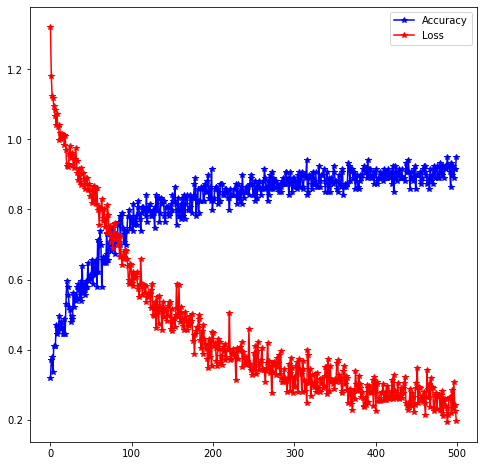

In [20]:
plt.figure(figsize= (8, 8))
plt.plot(data.accuracy, color = "b" , marker ="*" , label = "Accuracy")
plt.plot(data.loss , color = "r" , marker ="*"  , label ="Loss")
plt.legend()

##### Plotting the graph for loss and validation loss

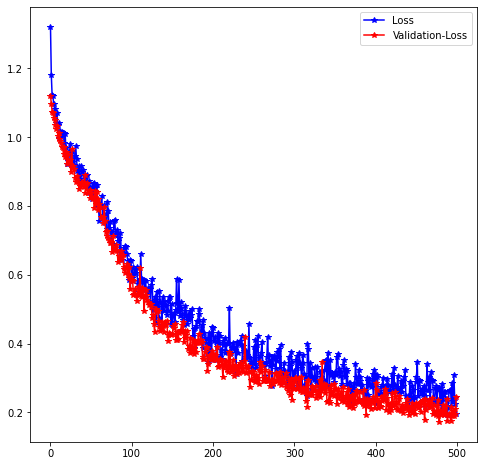

In [21]:
plt.figure(figsize= (8, 8))
plt.plot(data.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(data.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.legend()

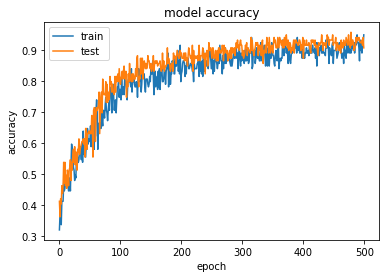

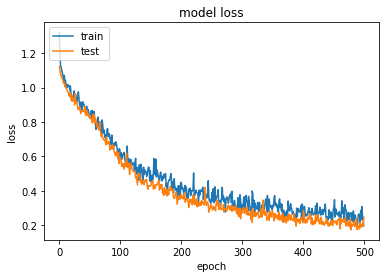

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Evaluate the model on training data

In [23]:
model.evaluate(training_data)

4/4 [==============================] - 7s 2s/step - loss: 0.2061 - accuracy: 0.9328


[0.206132173538208, 0.9327731132507324]

##### Evaluate the model on testing data

In [24]:
model.evaluate(test_data)

4/4 [==============================] - 7s 2s/step - loss: 0.2201 - accuracy: 0.9244


[0.22009043395519257, 0.924369752407074]

##### Prediction on test data

In [25]:
y_pred = model.predict(test_data)
y_pred

4/4 [==============================] - 8s 2s/step


array([[3.89680243e-03, 9.94454511e-03, 9.86158669e-01],
       [8.13667595e-01, 1.83036581e-01, 3.29579227e-03],
       [7.40370929e-01, 8.33304003e-02, 1.76298589e-01],
       [5.43546140e-01, 4.15250093e-01, 4.12038378e-02],
       [9.64136124e-01, 2.02015433e-02, 1.56624187e-02],
       [6.20000662e-07, 1.88730894e-06, 9.99997497e-01],
       [9.81703103e-01, 1.74462907e-02, 8.50567187e-04],
       [5.30721188e-01, 5.45033067e-02, 4.14775550e-01],
       [4.55270940e-03, 1.03148468e-01, 8.92298818e-01],
       [1.22366500e-05, 9.99987721e-01, 6.86145724e-11],
       [1.65765330e-01, 6.61693513e-02, 7.68065274e-01],
       [9.28532243e-01, 2.21628528e-02, 4.93049212e-02],
       [6.12292206e-03, 9.93457019e-01, 4.20121505e-04],
       [1.74989514e-02, 9.81307387e-01, 1.19367812e-03],
       [2.05810107e-02, 1.82341233e-01, 7.97077835e-01],
       [6.64542385e-05, 1.61993819e-06, 9.99931931e-01],
       [1.02561794e-01, 8.92287493e-01, 5.15074376e-03],
       [6.65781666e-11, 2.53749

In [26]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 2], dtype=int64)

In [27]:
model.get_weights()

[array([[[[-0.08784726, -0.06078382,  0.06955997, -0.16208099,
            0.09603655, -0.08735836, -0.14764774,  0.11234333,
           -0.12751187, -0.02404638,  0.11998482,  0.18434538,
            0.15522976, -0.00399726,  0.14392889, -0.02896312],
          [-0.04127693,  0.05569847,  0.1836221 , -0.1371339 ,
           -0.02234402,  0.09753002, -0.05388019, -0.08001117,
            0.03917449,  0.08715119,  0.09164589,  0.04926614,
            0.15978506, -0.145453  , -0.10302766, -0.172089  ],
          [-0.1474527 , -0.03860935, -0.11934458,  0.18068656,
            0.16497323,  0.06141773,  0.1300671 , -0.14577504,
            0.04738243,  0.1514457 ,  0.12049501, -0.09894823,
            0.11828871,  0.055059  ,  0.12812147, -0.1533418 ]],
 
         [[-0.03184591, -0.00859076, -0.02375112,  0.1594983 ,
           -0.05896995, -0.04866187,  0.17265488,  0.0180557 ,
            0.08018611, -0.03560195,  0.18284748,  0.01402206,
           -0.1791238 ,  0.10171576, -0.01039552,

##### Evaluating the Predictions on the Train Model

In [28]:
train_score = model.evaluate(training_data, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Train loss: 0.2048635184764862
Train accuracy: 0.9159663915634155


##### Evaluating the Predictions on the Test Model

In [29]:
test_score = model.evaluate(test_data, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 0.1926562786102295
Test accuracy: 0.9411764740943909


##### Reloading the model in order to use it in the app.py

In [30]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


model = load_model(r"C:\Users\Bhanu Prakash\OneDrive\Desktop\Data")
model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [32]:
model.get_weights()

[array([[[[-0.08863112, -0.06075956,  0.0695605 , -0.16202334,
            0.09601559, -0.08737984, -0.14757314,  0.1123648 ,
           -0.12756336, -0.02409758,  0.11983934,  0.18439013,
            0.15499997, -0.00436563,  0.14376535, -0.0293338 ],
          [-0.04238883,  0.05568143,  0.18374008, -0.13728248,
           -0.02233177,  0.0975972 , -0.05371438, -0.07994135,
            0.03900323,  0.08710015,  0.09177572,  0.04921945,
            0.15961744, -0.14572674, -0.10311288, -0.17255102],
          [-0.1512738 , -0.0385957 , -0.11939218,  0.18064532,
            0.16480428,  0.06145127,  0.13018312, -0.1453759 ,
            0.04714616,  0.1513927 ,  0.12041932, -0.09880593,
            0.11785109,  0.05490121,  0.12806462, -0.15407331]],
 
         [[-0.03264051, -0.00855594, -0.02377074,  0.15954435,
           -0.05899635, -0.04870337,  0.17272364,  0.0180823 ,
            0.08012968, -0.03562087,  0.1827141 ,  0.01406862,
           -0.17933573,  0.10133938, -0.01055947,

# Conclusion